In [80]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from abmax.structs import Params
from matplotlib.patches import FancyArrowPatch



import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

RENDER_DATA_PATH = "./data/"
MAX_SPAWN_X = 500.0 # max x in spawning arena
MAX_SPAWN_Y = 500.0 # max y in spawning arena
GRASS_RADIUS = 5.0
SHEEP_RADIUS = 5.0
EP_LEN = 500
NUM_SHEEP = 100
NUM_GRASS = 100


In [66]:
# first three: shapes should be (num_sheep, EP_len) --> (100, 500)
# grass_xs and grass_ys should be (num_grass, ) --> (100, )
# last one: shape should be (num_grass, EP_LEN) --> (100, 500)

In [86]:
sheep_xs = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_xs.npy')
sheep_ys = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_ys.npy')
sheep_angs = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_angs.npy')
grass_xs = jnp.load(RENDER_DATA_PATH + 'rendering_grass_xs.npy')
grass_ys = jnp.load(RENDER_DATA_PATH + 'rendering_grass_ys.npy')
grass_energies = jnp.load(RENDER_DATA_PATH + 'rendering_grass_energies.npy')


render_data = Params(
    content={
        'sheep_xs': sheep_xs,
        'sheep_ys': sheep_ys,
        'sheep_angs': sheep_angs,
        'grass_xs': grass_xs,
        'grass_ys': grass_ys,
        'grass_energies': grass_energies
    }
)

sheep_xs = render_data.content['sheep_xs']
sheep_ys = render_data.content['sheep_ys']
sheep_angs = render_data.content['sheep_angs']
grass_xs = render_data.content['grass_xs']
grass_ys = render_data.content['grass_ys']
grass_energies = render_data.content['grass_energies']

print(sheep_xs.shape, sheep_ys.shape, sheep_angs.shape, grass_xs.shape, grass_ys.shape, grass_energies.shape)

env_idx = 0
ep_idx = 0

# select and squeeze out the final singleton dim
sheep_xs_ = jnp.squeeze(sheep_xs[env_idx, ep_idx])
sheep_ys_ = jnp.squeeze(sheep_ys[env_idx, ep_idx])
sheep_angs_ = jnp.squeeze(sheep_angs[env_idx, ep_idx])

grass_xs_ = grass_xs[env_idx, ep_idx]
grass_ys_ = grass_ys[env_idx, ep_idx]
grass_energies_ = jnp.squeeze(grass_energies[env_idx, ep_idx])

print(sheep_xs_.shape, sheep_ys_.shape, sheep_angs_.shape,
      grass_xs_.shape, grass_ys_.shape, grass_energies_.shape)


(10, 10, 500, 100, 1) (10, 10, 500, 100, 1) (10, 10, 500, 100, 1) (10, 10, 100) (10, 10, 100) (10, 10, 500, 100, 1)
(500, 100) (500, 100) (500, 100) (100,) (100,) (500, 100)


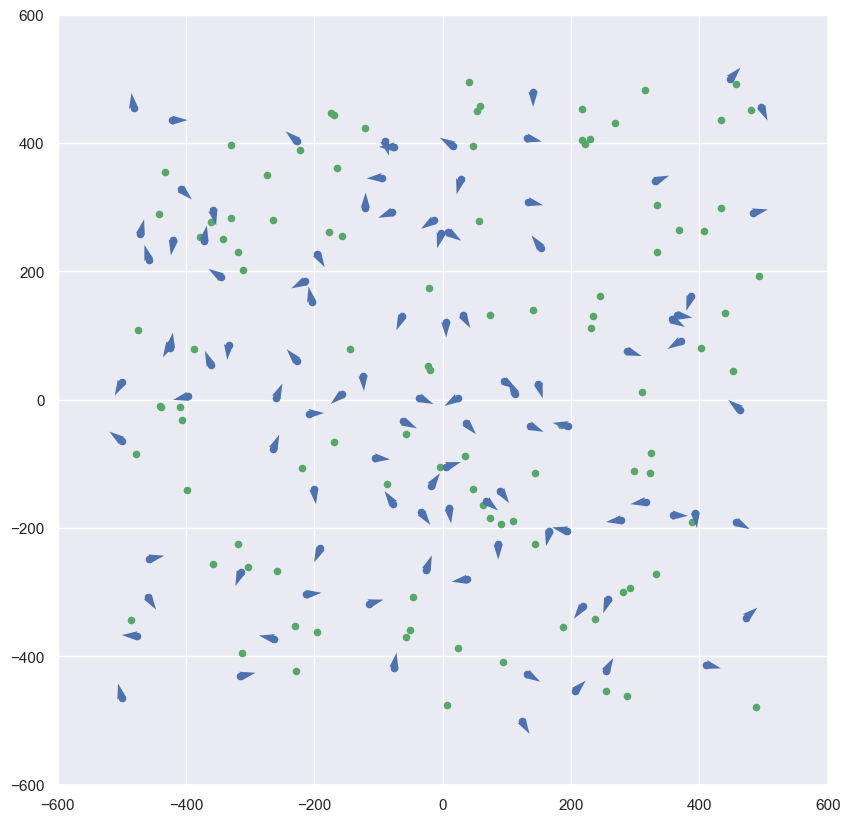

In [87]:
def render_one_traj(render_data):
    sheep_xs = render_data.content['sheep_xs']       # shape after selection: (EP_LEN, num_sheep)
    sheep_ys = render_data.content['sheep_ys']       # shape after selection: (EP_LEN, num_sheep)
    sheep_angs = render_data.content['sheep_angs']   # shape after selection: (EP_LEN, num_sheep)
    grass_xs = render_data.content['grass_xs']       # shape: (num_grass,)
    grass_ys = render_data.content['grass_ys']       # shape: (num_grass,)
    grass_energies = render_data.content['grass_energies'] # shape: (EP_LEN, num_grass)

    # Get initial frame (frame 0)
    sheep_init_xs = sheep_xs[0, :]      # shape: (num_sheep,)
    sheep_init_ys = sheep_ys[0, :]      # shape: (num_sheep,)
    sheep_init_angs = sheep_angs[0, :]  # shape: (num_sheep,)
    grass_init_energies = grass_energies[0, :]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(- 1.2*MAX_SPAWN_X, 1.2*MAX_SPAWN_X)
    ax.set_ylim(- 1.2*MAX_SPAWN_Y, 1.2*MAX_SPAWN_Y)
    ax.set_aspect('equal')

    # scatter plot of all grasses
    grass_scatter = ax.scatter(grass_xs, grass_ys, c='g', s=GRASS_RADIUS*4)
    # scatter plot of all sheep
    sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4)

    # create the quiver (arrow)
    sheep_quiver = ax.quiver(sheep_init_xs, sheep_init_ys,
                              jnp.cos(sheep_init_angs), jnp.sin(sheep_init_angs),
                              color='b', scale=50.0)

    # create text objects that will be updated
    def update(frame):
        grass_scatter.set_offsets(jnp.vstack((grass_xs, grass_ys)).T)
        sheep_scatter.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)

        sheep_quiver.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)
        sheep_quiver.set_UVC(jnp.cos(sheep_angs[frame,:]), jnp.sin(sheep_angs[frame,:])) # update direction components

        return sheep_scatter, sheep_quiver, grass_scatter

    ani = FuncAnimation(fig, update, frames=range(sheep_xs.shape[0]), blit=True)
    ani.save('./pred_prey_scatter.mp4', writer='ffmpeg', fps=10)

# Create render_data with properly shaped arrays
render_data_for_viz = Params(
    content={
        'sheep_xs': sheep_xs_,           # (EP_LEN, num_sheep)
        'sheep_ys': sheep_ys_,           # (EP_LEN, num_sheep)
        'sheep_angs': sheep_angs_,       # (EP_LEN, num_sheep)
        'grass_xs': grass_xs_,           # (num_grass,)
        'grass_ys': grass_ys_,           # (num_grass,)
        'grass_energies': grass_energies_ # (EP_LEN, num_grass)
    }
)

render_one_traj(render_data_for_viz)

In [69]:
#render_one_traj(render_data)

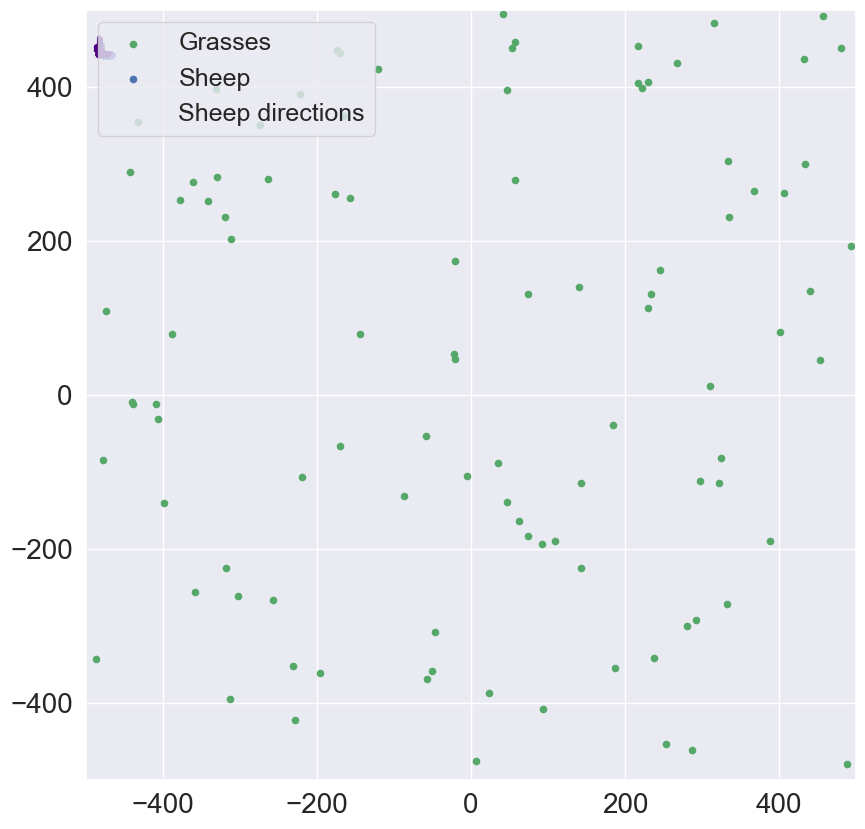

In [85]:
sheep_xs = render_data_for_viz.content['sheep_xs'] #shape: (num_foragers, EP_LEN)
sheep_ys = render_data_for_viz.content['sheep_ys'] #shape: (num_foragers, EP_LEN)
sheep_angs = render_data_for_viz.content['sheep_angs'] #shape: (num_foragers, EP_LEN)
grass_xs = render_data_for_viz.content['grass_xs'] #shape: (num_patches, )
grass_ys = render_data_for_viz.content['grass_ys'] #shape: (num_patches, )
grass_energies = render_data_for_viz.content['grass_energies']#shape: (num_patches, EP_LEN)

sheep_init_xs = sheep_xs[0, :]
sheep_init_ys = sheep_ys[0, :]
sheep_init_angs = sheep_angs[0, :]
grass_init_energies = grass_energies[0, :]

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(- MAX_SPAWN_X, MAX_SPAWN_X)
ax.set_ylim(- MAX_SPAWN_Y, MAX_SPAWN_Y)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_aspect('equal')

patch_scatter = ax.scatter(grass_xs, grass_ys, c='g', s=GRASS_RADIUS*4, label='Patches')

#sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4, alpha=0.3, edgecolors='black', linewidths=1.5)

sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4, label='Sheep')
sheep_quiver = ax.quiver(sheep_init_xs, sheep_init_ys, jnp.cos(sheep_init_angs), jnp.sin(sheep_init_angs), color='indigo', scale=80.0)

#sheep_ghost_triangle = ax.arrow(0.0,0.0,0.0,0.0,head_width=2.0, head_length=2.0, fc='indigo', ec='indigo', label='Sheep Direction')
# make a ghost indigo triangle for the quiver legend
arrow_patch = FancyArrowPatch((0, 0), (1, 0),
                            color='indigo', alpha = 0.0,
                            mutation_scale=15,  # Controls arrow head size
                            linewidth=1.5,
                            arrowstyle='->', label='Forager Direction')
#legend
#ax.legend(loc='upper left',fontsize=18)
ax.legend([patch_scatter, sheep_scatter, arrow_patch],
          ['Grasses', 'Sheep', 'Sheep directions'],
          loc='upper left', fontsize=18)
plt.savefig('./pred_prey_scatter.svg', bbox_inches='tight')

#plt.show()


In [ ]:
#
def render_one_traj(render_data):
    sheep_xs = render_data.content['sheep_xs'] #shape: (num_sheep, EP_LEN)
    sheep_ys = render_data.content['sheep_ys'] #shape: (num_sheep, EP_LEN)
    sheep_angs = render_data.content['sheep_angs'] #shape: (num_sheep, EP_LEN)
    grass_xs = render_data.content['grass_xs'] #shape: (num_patches, )
    grass_ys = render_data.content['grass_ys'] #shape: (num_patches, )
    grass_energies = render_data.content['grass_energies']#shape: (num_patches, EP_LEN)

    sheep_init_xs = sheep_xs[0, :]
    sheep_init_ys = sheep_ys[0, :]
    sheep_init_angs = sheep_angs[0, :]
    grass_init_energies = grass_energies[0, :]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(- 1.2*MAX_SPAWN_X, 1.2*MAX_SPAWN_X)
    ax.set_ylim(- 1.2*MAX_SPAWN_Y, 1.2*MAX_SPAWN_Y)
    ax.set_aspect('equal')

    # scatter plot of all grasses
    grass_scatter = ax.scatter(grass_xs, grass_ys, c='g', s=GRASS_RADIUS*4) # 15, when rad=10, 8 when rad = 7.5
    # scatter plot of all sheep
    sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4)

    # create the quiver (arrow) with a scale to make it 50% smaller
    sheep_quiver = ax.quiver(sheep_init_xs, sheep_init_ys, jnp.cos(sheep_init_angs), jnp.sin(sheep_init_angs), color='b', scale=50.0)


    # Create text objects that will be updated
    def update(frame):
        grass_scatter.set_offsets(jnp.vstack((grass_xs, grass_ys)).T)
        sheep_scatter.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)

        sheep_quiver.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)
        sheep_quiver.set_UVC(jnp.cos(sheep_angs[frame,:]), jnp.sin(sheep_angs[frame,:])) # update direction components

        # Return all agents that need to be redrawn
        return sheep_scatter, sheep_quiver, grass_scatter

    ani = FuncAnimation(fig, update, frames=range(sheep_xs.shape[0]), blit=True)
    ani.save('./pred_prey_scatter.mp4', writer='ffmpeg', fps=10)